# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

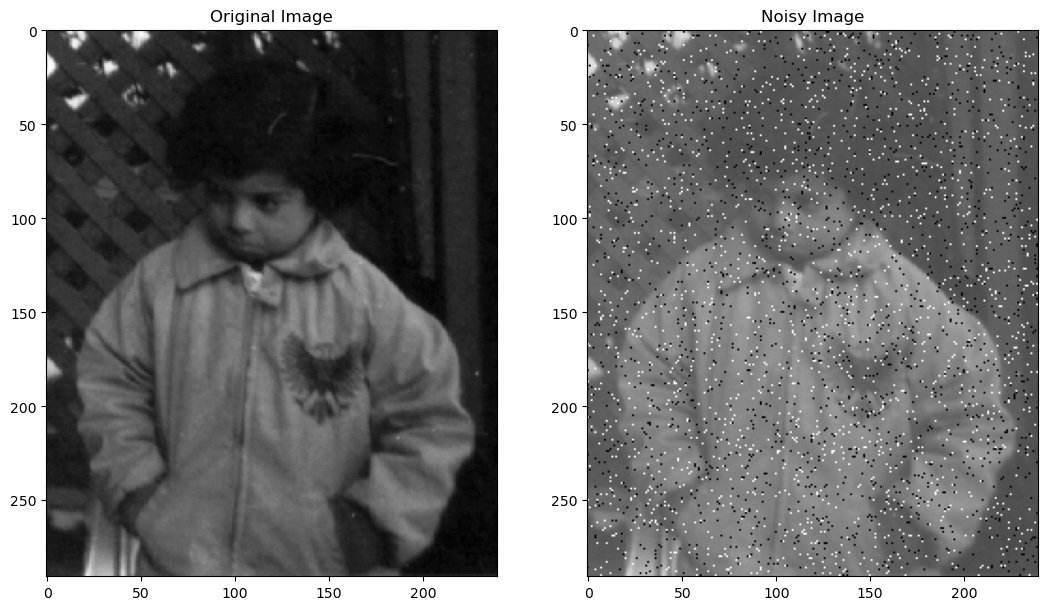

In [2]:
original_img = io.imread('pout.tif')
noisy_img = random_noise(original_img, mode='s&p', amount=0.05)
show_images([original_img, noisy_img], ['Original Image', 'Noisy Image'])

In [3]:
'''
(1) Your own median filter algorithm
 edgex := (window width / 2) rounded down 
edgey := (window height / 2) rounded down 
for x from edgex to image width - edgex 
{ 
       for y from edgey to image height - edgey 
       { 
                allocate colorArray[window height][window width] 
                for fx from 0 to window width 
                        for fy from 0 to window height 
                                   colorArray[fy][fx] := inputPixelValue [y + fy - edgey] [x + fx - edgex] 
               sort all entries in colorArray[][] 
               outputPixelValue[y][x] := colorArray [window height / 2] [window width / 2] 
      } 
} 

'''

def median_filter(img):
    img = np.array(img)
    window_width = 3
    window_height = 3
    edgex = window_width // 2
    edgey = window_height // 2
    output = np.zeros_like(img)
    for x in range(edgex, img.shape[1] - edgex):
        for y in range(edgey, img.shape[0] - edgey):
            colorArray = np.zeros((window_height, window_width))
            for fx in range(window_width):
                for fy in range(window_height):
                    colorArray[fy][fx] = img[y + fy - edgey][x + fx - edgex]
            colorArray = np.sort(colorArray.flatten())
            output[y][x] = colorArray[4]
    return output

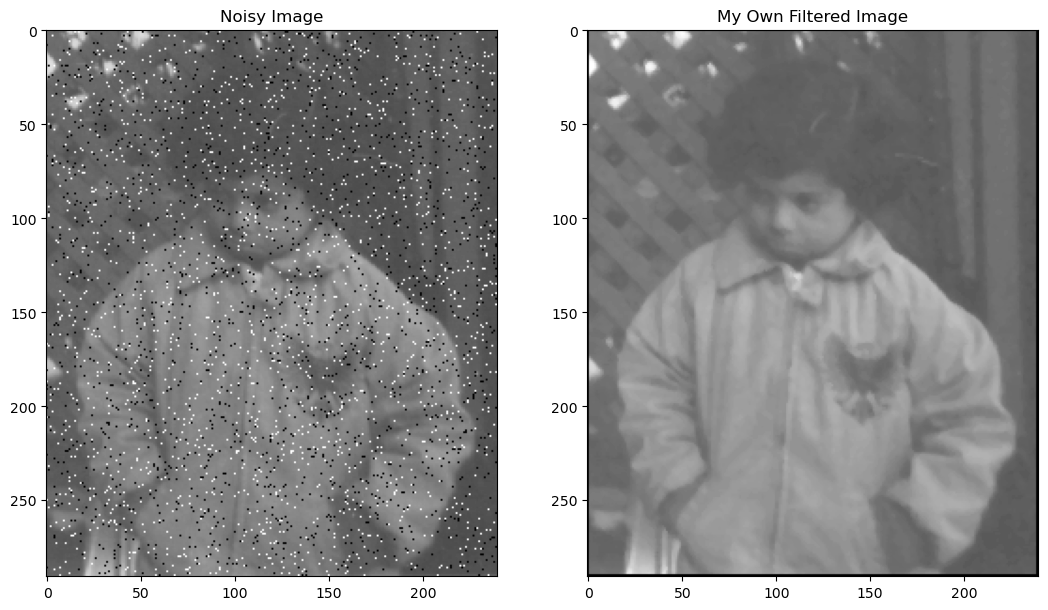

In [4]:
median_filtered_img = median_filter(noisy_img)
show_images([noisy_img, median_filtered_img], ['Noisy Image', 'My Own Filtered Image'])

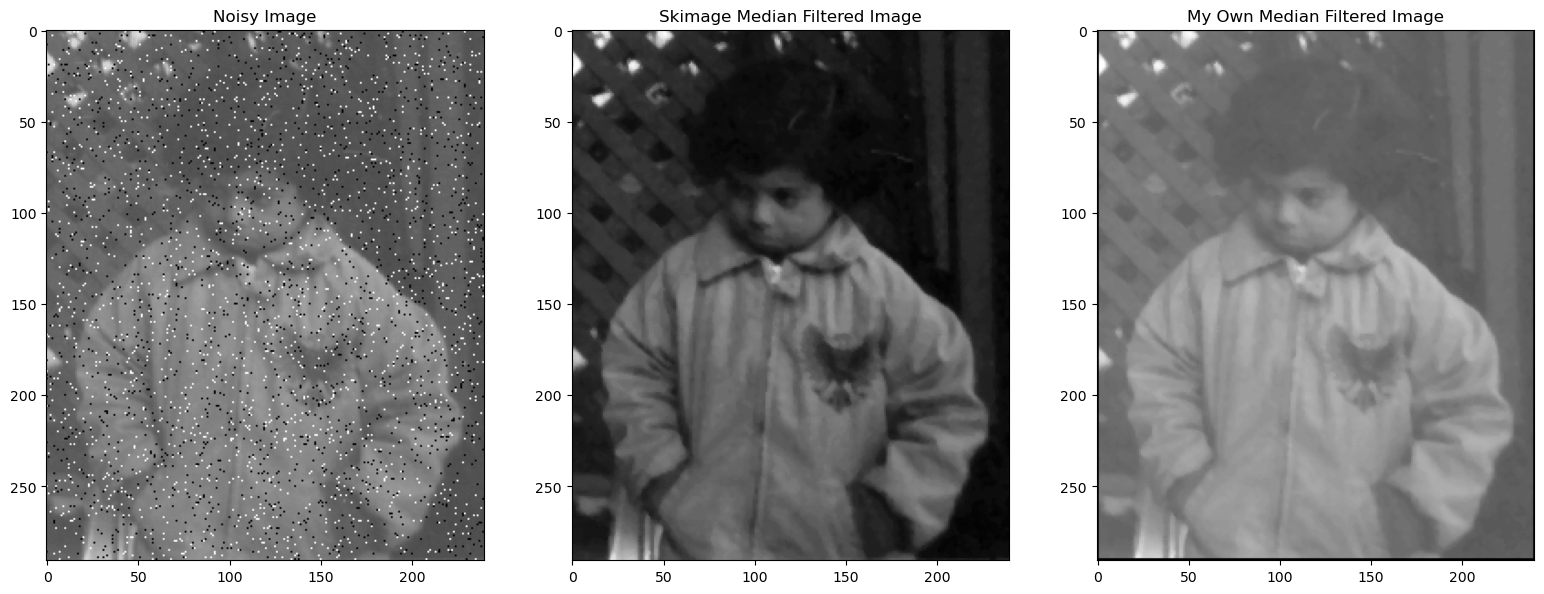

In [5]:
'''
(2) skimage median filter
'''
skimage_median_filtered_img = median(noisy_img)
show_images([noisy_img, skimage_median_filtered_img,median_filtered_img], ['Noisy Image', 'Skimage Median Filtered Image','My Own Median Filtered Image'])



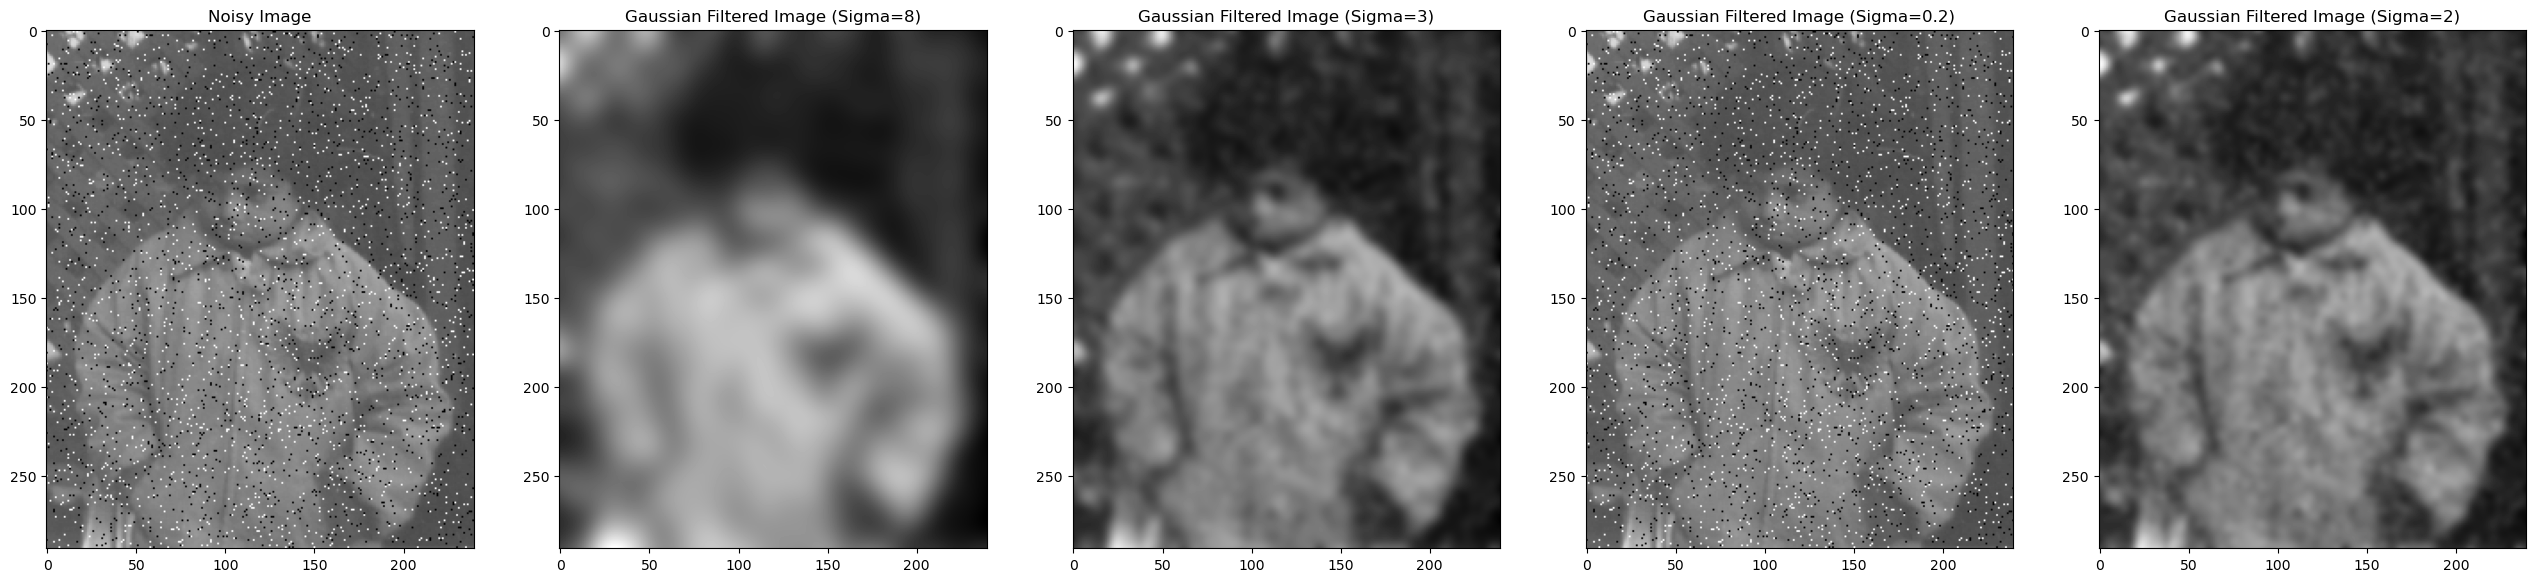

In [10]:
'''
(3) Gaussion Filters
'''

from skimage.filters import gaussian
'''
Apply Gaussian Filtering to the noisy image with different sigma values (ex: 8, 3, & 0.2). 
Experiment a little to find a suitable value of sigma that fits the image
'''
gaussian_filtered_img_8 = gaussian(noisy_img, sigma=8)
gaussian_filtered_img_3 = gaussian(noisy_img, sigma=3)
gaussian_filtered_img_02 = gaussian(noisy_img, sigma=0.2)
gaussian_filtered_img_2 = gaussian(noisy_img, sigma=2.4)
show_images([noisy_img, gaussian_filtered_img_8, gaussian_filtered_img_3, gaussian_filtered_img_02,gaussian_filtered_img_2], ['Noisy Image', 'Gaussian Filtered Image (Sigma=8)', 'Gaussian Filtered Image (Sigma=3)', 'Gaussian Filtered Image (Sigma=0.2)', 'Gaussian Filtered Image (Sigma=2)'])

